In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

from sklearn.metrics import roc_auc_score, roc_curve

In [15]:
size_0 = 10000
size_1 = 100

In [53]:
def generate_sample(total_entries = 100, frac_1 = 0.01, n_loops=1000, use_tqdm=True):
    
    
    size_1 = int(frac_1*total_entries)
    size_0 = int((1-frac_1)*total_entries)
    
    y_0 = np.zeros(shape=size_0)
    y_1 = np.ones(shape=size_1)
    y = np.hstack([y_0,y_1])
    

    loop_range = tqdm(range(n_loops)) if use_tqdm else range(n_loops)
    
    aucs = list()
    
    for i in loop_range:
        generate_0 = np.random.normal(0.3,0.2, size=size_0)
        generate_1 = np.random.normal(0.7,0.2,size=size_1)
        
        proba = np.hstack([generate_0, generate_1])
        
        aucs.append(roc_auc_score(y,proba))
        
    return aucs 

In [ ]:
generate_sample(total_entries = n, frac_1 = frac_1)

In [69]:
def get_stats(frac=0.01, entries = [1000,10000,50000,100000]):
    

    all_aucs = list()
    for n in entries:
        print(f'running {n} Entries: average bads {int(frac*n)} ')

        aucs = generate_sample(total_entries = n, frac_1 = frac)
        all_aucs.append(aucs)

    n_bads = [frac*entr for entr in entries] 
    
    auc_mean = np.array([np.array(out_auc).mean() for out_auc in all_aucs])
    auc_std = np.array([np.array(out_auc).std() for out_auc in all_aucs])
    
    return entries,n_bads, auc_mean, auc_std

In [70]:
entries_001,n_bads_001, auc_mean_001, auc_std_001 = get_stats(frac=0.01)
entries_005,n_bads_005, auc_mean_005, auc_std_005 = get_stats(frac=0.05)
entries_015,n_bads_015, auc_mean_015, auc_std_015 = get_stats(frac=0.15)
entries_050,n_bads_050, auc_mean_050, auc_std_050 = get_stats(frac=0.5)

running 1000 Entries: average bads 10 



running 10000 Entries: average bads 100 



running 50000 Entries: average bads 500 



running 100000 Entries: average bads 1000 



running 1000 Entries: average bads 50 



running 10000 Entries: average bads 500 



running 50000 Entries: average bads 2500 



running 100000 Entries: average bads 5000 



running 1000 Entries: average bads 150 



running 10000 Entries: average bads 1500 



running 50000 Entries: average bads 7500 



running 100000 Entries: average bads 15000 



running 1000 Entries: average bads 500 



running 10000 Entries: average bads 5000 



running 50000 Entries: average bads 25000 



running 100000 Entries: average bads 50000 


In [74]:
def plot(n_bads, auc_mean, auc_std, label, color, ax):
    ax[0].set_xlabel("Log N bads")
    ax[0].set_ylabel("AUC")

    ax[0].set_ylim(0.88, 1)

    ax[0].fill_between(n_bads_001, auc_mean - auc_std,
                        auc_mean + auc_std,
                        alpha=0.1,color=color)
    ax[0].plot(n_bads, auc_mean, color=color, label = label)
    ax[0].semilogx()

    one_over_nbads = [1./np.sqrt(bads) for bads in n_bads]

    ax[1].plot(one_over_nbads, auc_std,color=color, label = label)
    ax[1].set_xlabel("1/sqrt(N bads)")
    ax[1].set_ylabel("std AUC")
    
    ax[0].legend()
    ax[1].legend()

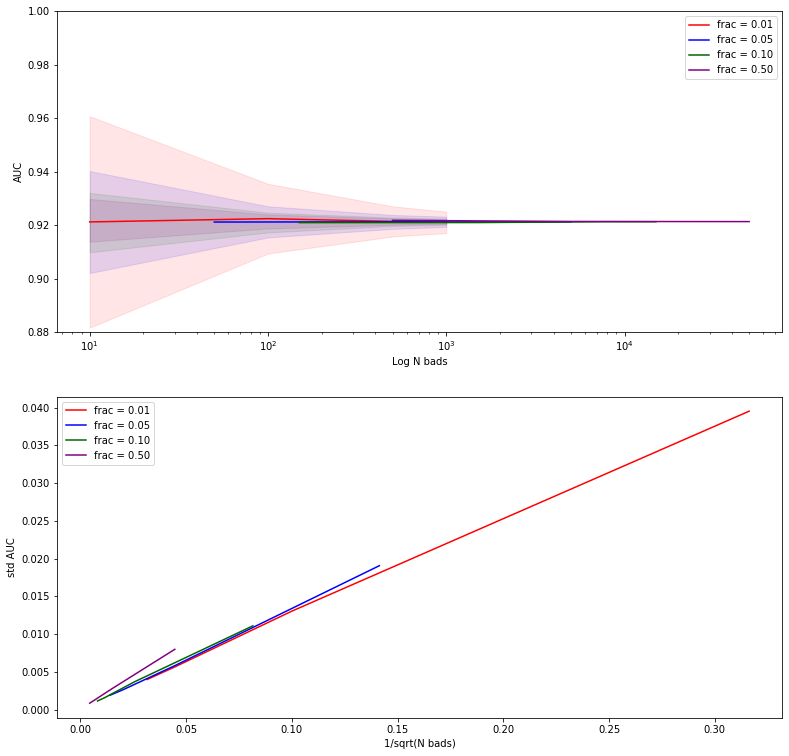

In [75]:
fig, ax = plt.subplots(2,1,figsize=(13, 13))

plot(n_bads_001, auc_mean_001, auc_std_001, label='frac = 0.01', color='red',ax=ax)
plot(n_bads_005, auc_mean_005, auc_std_005, label='frac = 0.05', color='blue',ax=ax)
plot(n_bads_015, auc_mean_015, auc_std_015, label='frac = 0.10', color='darkgreen',ax=ax)
plot(n_bads_050, auc_mean_050, auc_std_050, label='frac = 0.50', color='purple',ax=ax)
